In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation


In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,plot_model
import cv2
import os


In [ ]:
img=cv2.imread("/content/drive/MyDrive/brain_tumor_dataset/yes/Y10.jpg")
img


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [247, 247, 247],
        [250, 250, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 249, 249],
        [250, 250, 250],
        [248, 248, 248]],

       [[255, 255, 255],
        [253, 253, 253],
        [234, 234, 234],
        ...,
        [233, 233, 233],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [234, 234, 234],
        ...,
        [233, 233, 233],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 249, 249],
        [251, 251, 251],
        [251, 251, 251]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [249, 249, 249],
        [253, 253, 253]]

In [ ]:
print(img.shape)

(360, 319, 3)


In [ ]:
encoder=OneHotEncoder()
encoder.fit([["no"],["yes"]])


OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/brain_tumor_dataset/no"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if (Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(encoder.transform([["no"]]).toarray())


In [ ]:
paths=[]
for r,d,f in os.walk("/content/drive/MyDrive/brain_tumor_dataset/yes"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if (Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(encoder.transform([["yes"]]).toarray())

In [ ]:
data=np.array(data)
print(data.shape)

(139, 128, 128, 3)


In [ ]:
result=np.array(result)
result=result.reshape(139,2)


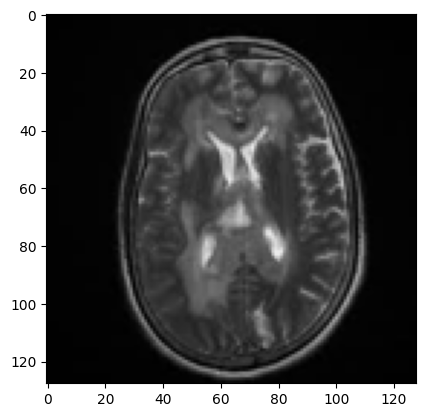

In [ ]:
plt.imshow(data[5])


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=0.20,shuffle=True,random_state=0)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="same"))
model.add(Conv2D(32,(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,Activation("softmax")))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_9 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
xtrain.shape

(111, 128, 128, 3)

In [ ]:
ytrain.shape

(111, 2)

In [ ]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/10
2/2 [==============================] - 13s 4s/step - loss: 3.8732 - accuracy: 0.4595 - val_loss: 2.5035 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 9s 5s/step - loss: 2.1731 - accuracy: 0.6847 - val_loss: 2.1857 - val_accuracy: 0.6071
Epoch 3/10
2/2 [==============================] - 7s 3s/step - loss: 1.7938 - accuracy: 0.6937 - val_loss: 1.7325 - val_accuracy: 0.7143
Epoch 4/10
2/2 [==============================] - 8s 3s/step - loss: 1.3262 - accuracy: 0.6577 - val_loss: 1.3272 - val_accuracy: 0.7143
Epoch 5/10
2/2 [==============================] - 7s 3s/step - loss: 0.7469 - accuracy: 0.7297 - val_loss: 1.1614 - val_accuracy: 0.6071
Epoch 6/10
2/2 [==============================] - 9s 3s/step - loss: 0.9029 - accuracy: 0.7207 - val_loss: 1.2902 - val_accuracy: 0.6071
Epoch 7/10
2/2 [==============================] - 8s 4s/step - loss: 0.8191 - accuracy: 0.7658 - val_loss: 1.4358 - val_accuracy: 0.6786
Epoch 8/10
2/2 [========================

In [ ]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=64)

1/1 [==============================] - 1s 537ms/step - loss: 1.0566 - accuracy: 0.5714


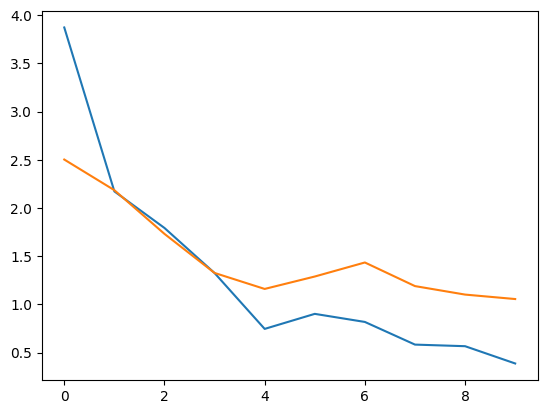

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
def tumor(num):
  if num==0:
    return "no"
  else:
    return "yes"


Result is no


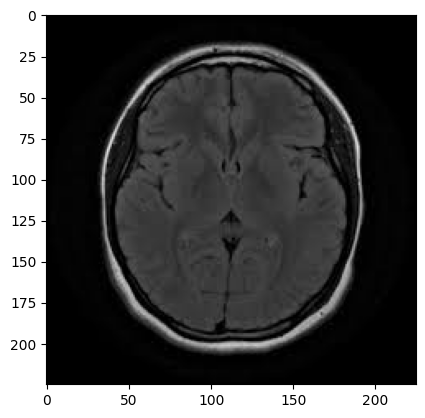

In [ ]:
img=Image.open("/content/drive/MyDrive/brain_tumor_dataset/no/no 100.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print("Result is "+tumor(classification))

Result is yes


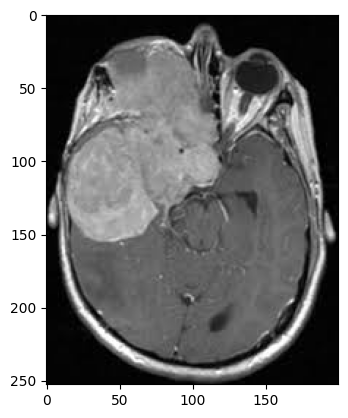

In [ ]:
img=Image.open("/content/drive/MyDrive/brain_tumor_dataset/yes/Y106.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print("Result is "+tumor(classification))